In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Data6.csv'
df = pd.read_csv(file_path,sep=';')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [ ]:
df.shape
#affiche les dimentions du data

(4898, 12)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df=df.dropna()
#supprime les lignes avec des valeurs manquanteses


In [ ]:
df.drop_duplicates(inplace=True)
#supprime les lignes duplicate


In [ ]:
df.shape


(3961, 12)

In [ ]:
same_value_columns = df.columns[df.nunique() == 1]

print(same_value_columns)
#colone qui tout les valeurs sont le meme

Index([], dtype='object')


In [ ]:
# Compter les colonnes contenant des chaînes de caractères
x= df.select_dtypes(include=['object'])
print(f"Nombre de colonnes contenant des chaînes de caractères : {x.shape[1]}")
print(x.columns.tolist())

Nombre de colonnes contenant des chaînes de caractères : 0
[]


lineaire regression


(array([  20.,  153.,    0., 1175.,    0., 1788.,  689.,    0.,  131.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

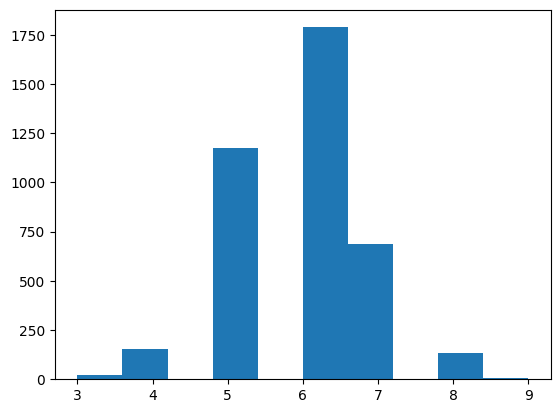

In [ ]:
def regrouper_qualite(q):
    if q <= 5:
        return 'basse'
    elif q <= 6:
        return 'moyenne'
    else:
        return 'haute'

df['quality_label'] = df['quality'].apply(regrouper_qualite)
plt.hist(df['quality'])

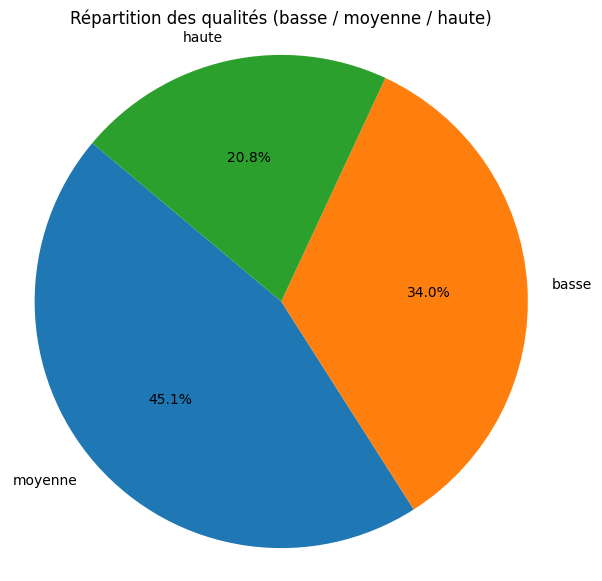

In [ ]:
quality_counts = df['quality_label'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des qualités (basse / moyenne / haute)")
plt.axis('equal')
plt.show()

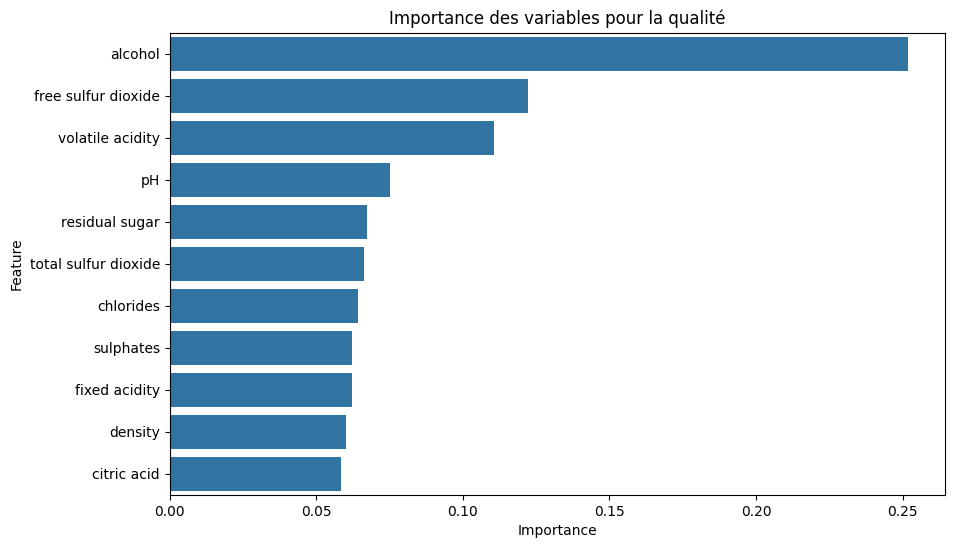

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = df.drop(columns=['quality'])
y = df['quality']

# Entraînement du modèle
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Importance des variables
importances = rf_model.feature_importances_

# Affichage
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importance des variables pour la qualité')
plt.show()
#dapres la graphe cidesus tout les valeurs important pour la qualité

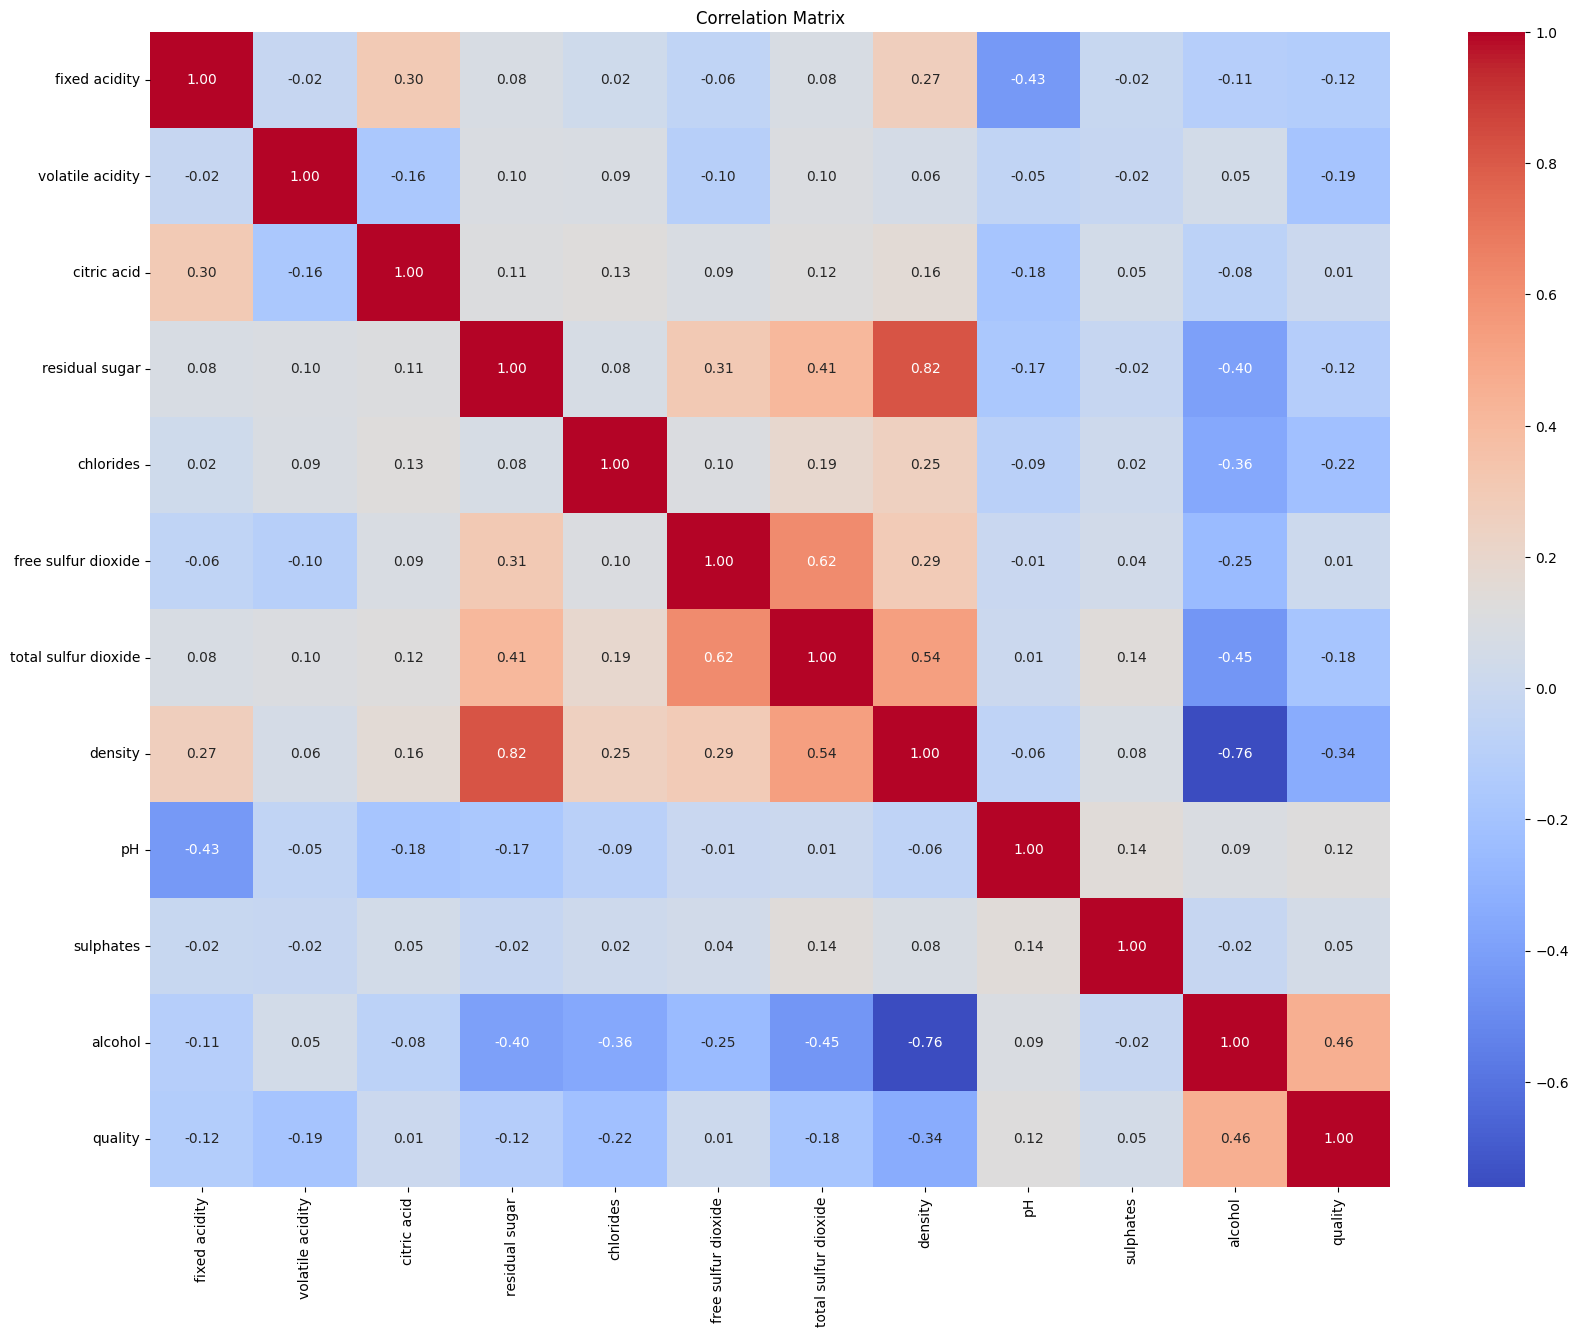

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

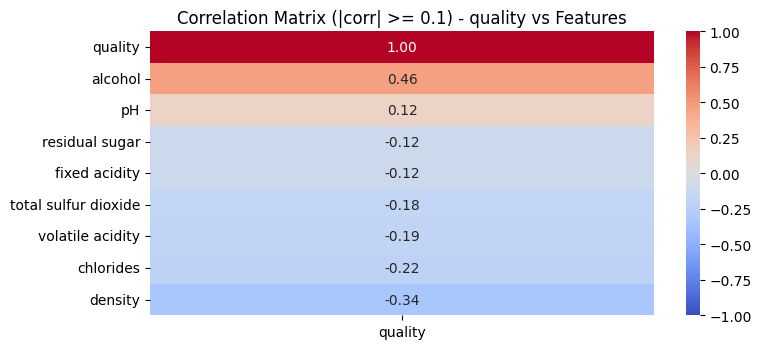

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcul des corrélations
salareprive_corr = df.corr()[['quality']].sort_values(by='quality', ascending=False)

# Filtrage pour garder uniquement |corrélation| >= 0.1
filtered_corr = salareprive_corr[salareprive_corr['quality'].abs() >= 0.1]

# Visualisation
plt.figure(figsize=(8, len(filtered_corr)*0.4))  # Ajuste la hauteur dynamiquement
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix (|corr| >= 0.1) - quality vs Features")
plt.tight_layout()  # Améliore l'espacement
plt.show()
# Liste des colonnes à supprimer
cols_to_drop = salareprive_corr[salareprive_corr['quality'].abs() < 0.1].index

# Création d'un nouveau DataFrame sans ces colonnes
df_filtered = df.drop(columns=cols_to_drop)

In [ ]:
# Afficher la liste complète de tous les attributs
print("=== LISTE COMPLÈTE DES ATTRIBUTS ===")
print(list(df_filtered.columns))
print("\nNombre total d'attributs :", len(df_filtered.columns))

=== LISTE COMPLÈTE DES ATTRIBUTS ===
['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'alcohol', 'quality']

Nombre total d'attributs : 9


In [ ]:
cols_to_keep = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
                'total sulfur dioxide', 'density', 'pH', 'alcohol', 'quality']

df = df[cols_to_keep]


Performance du modèle de Régression Linéaire :
MAE  (Erreur Absolue Moyenne)       : 0.60
MSE  (Erreur Quadratique Moyenne)  : 0.61
RMSE (Racine de l'erreur quadratique) : 0.78
R²   (Score de détermination)      : 0.26


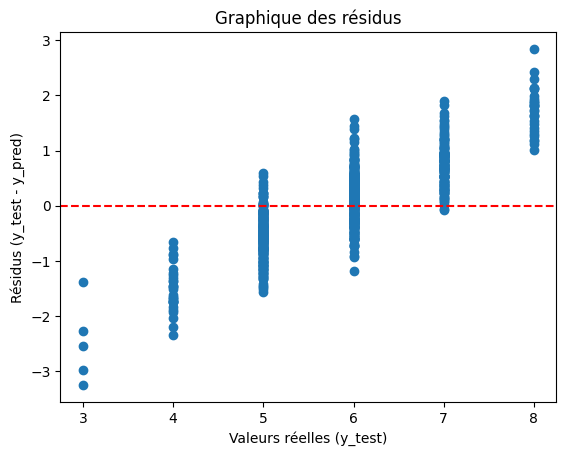

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Séparation des variables
x = df.drop('quality', axis=1)
y = df['quality']

# Division des données
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
MLR = LinearRegression()
MLR.fit(x_train, y_train)

# Prédictions
y_pred = MLR.predict(x_test)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print("Performance du modèle de Régression Linéaire :")
print(f"MAE  (Erreur Absolue Moyenne)       : {mae:.2f}")
print(f"MSE  (Erreur Quadratique Moyenne)  : {mse:.2f}")
print(f"RMSE (Racine de l'erreur quadratique) : {rmse:.2f}")
print(f"R²   (Score de détermination)      : {r2:.2f}")

# Graphique des résidus
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Résidus (y_test - y_pred)")
plt.title("Graphique des résidus")
plt.show()


In [ ]:
testing_data = MLR.score(x_test, y_test)
print("Performance on testing data :",testing_data)
training_data = MLR.score(x_train, y_train)
print("Performance on training data :",training_data)

Performance on testing data : 0.26159405046664475
Performance on training data : 0.2937430404118536


In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data.head(100)

,Actual,Predicted
176,4,6.356728
1214,6,5.499879
1525,5,5.240067
862,6,5.681092
386,7,6.327930
...,...,...
194,5,5.136837
1762,7,6.265912
3137,6,6.109850
2520,5,5.381965


Performance du modèle de Régression Linéaire :
MAE  (Erreur Absolue Moyenne)       : 0.60
MSE  (Erreur Quadratique Moyenne)  : 0.60
RMSE (Racine de l'erreur quadratique) : 0.77
R²   (Score de détermination)      : 0.27


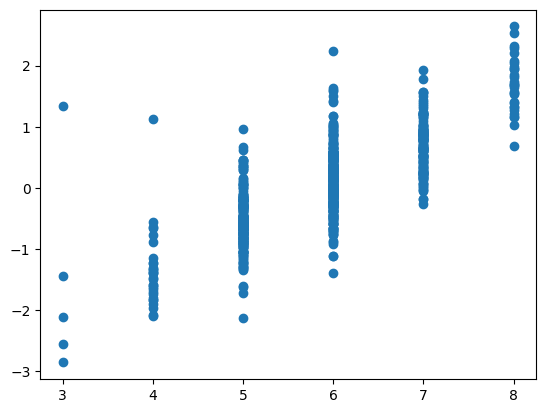

In [ ]:
#regression polynomiale
poly = PolynomialFeatures(degree=2)
x_train_transformed = poly.fit_transform(x_train)
x_test_transformed = poly.transform(x_test)

PR = LinearRegression()
PR.fit(x_train_transformed, y_train)

y_pred = PR.predict(x_test_transformed)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print("Performance du modèle de Régression Linéaire :")
print(f"MAE  (Erreur Absolue Moyenne)       : {mae:.2f}")
print(f"MSE  (Erreur Quadratique Moyenne)  : {mse:.2f}")
print(f"RMSE (Racine de l'erreur quadratique) : {rmse:.2f}")
print(f"R²   (Score de détermination)      : {r2:.2f}")

r = y_test - y_pred
plt.scatter(y_test, r)
plt.show()


In [ ]:

# 1. Instanciation de la transformation polynomiale (degré 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(x_train)
X_test_poly  = poly.transform(x_test)

# 3. Entraînement du modèle de régression linéaire sur les features polynomiales
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 4. Prédiction sur le jeu de test transformé
y_pred = model.predict(X_test_poly)

# 5. Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"RMSE = {rmse:.3f}")
print(f"R²   = {r2:.3f}")


RMSE = 0.775
R²   = 0.268


clssification

In [ ]:
#random forest classification
x = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.43      0.10      0.16        30
           5       0.56      0.56      0.56       234
           6       0.52      0.70      0.60       349
           7       0.49      0.27      0.35       145
           8       0.25      0.03      0.06        30

    accuracy                           0.53       793
   macro avg       0.38      0.28      0.29       793
weighted avg       0.51      0.53      0.50       793



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


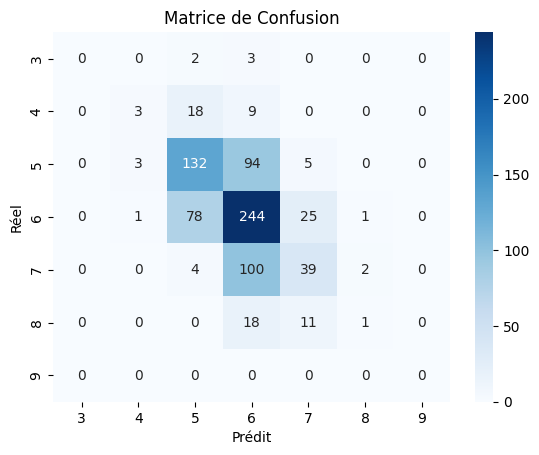

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


clustering

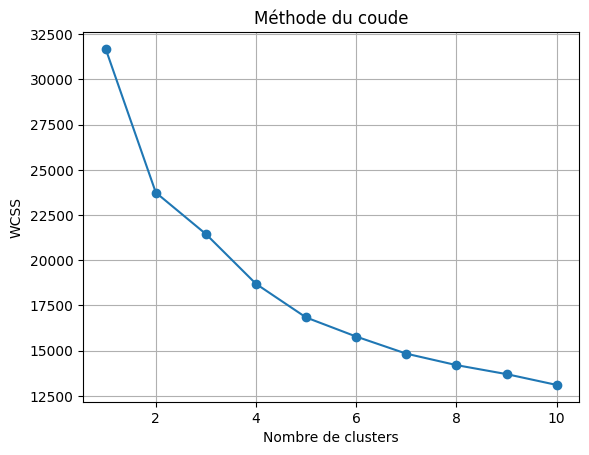

In [ ]:
df_cluster = df.drop(columns=['quality'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()



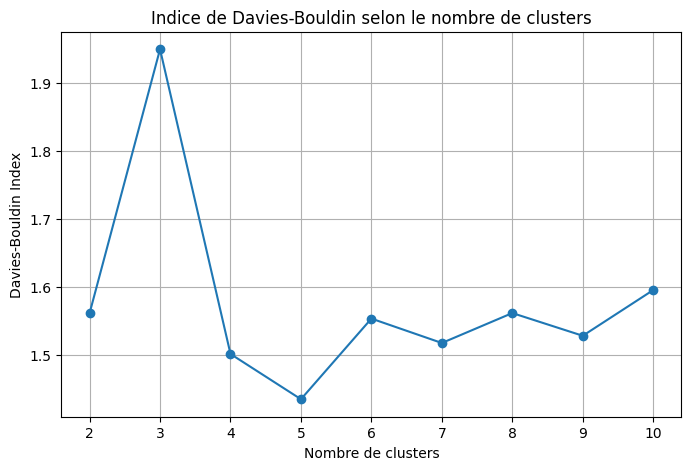

In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    dbi = davies_bouldin_score(X_scaled, labels)
    dbi_scores.append(dbi)

# Tracer la courbe du Davies-Bouldin Index
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, dbi_scores, marker='o')
plt.title("Indice de Davies-Bouldin selon le nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Davies-Bouldin Index")
plt.grid(True)
plt.show()

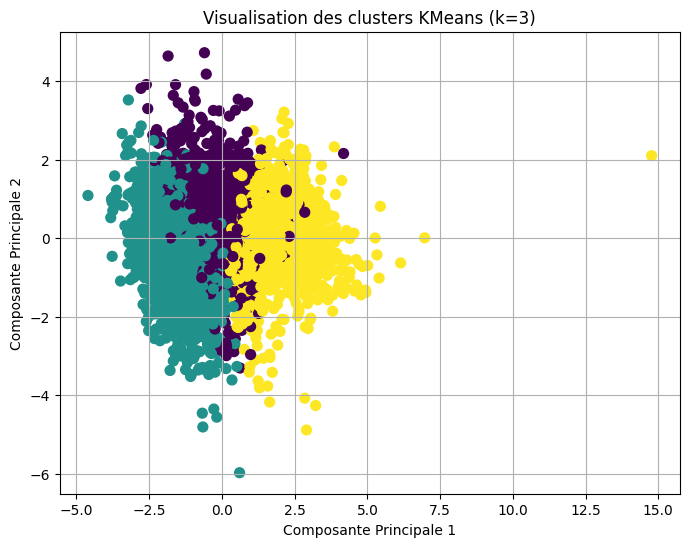

In [ ]:
def plot_kmeans_clusters(X_scaled, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.title(f'Visualisation des clusters KMeans (k={n_clusters})')
    plt.xlabel('Composante Principale 1')
    plt.ylabel('Composante Principale 2')
    plt.grid(True)
    plt.show()

# Affichage pour k=3
plot_kmeans_clusters(X_scaled, 3)


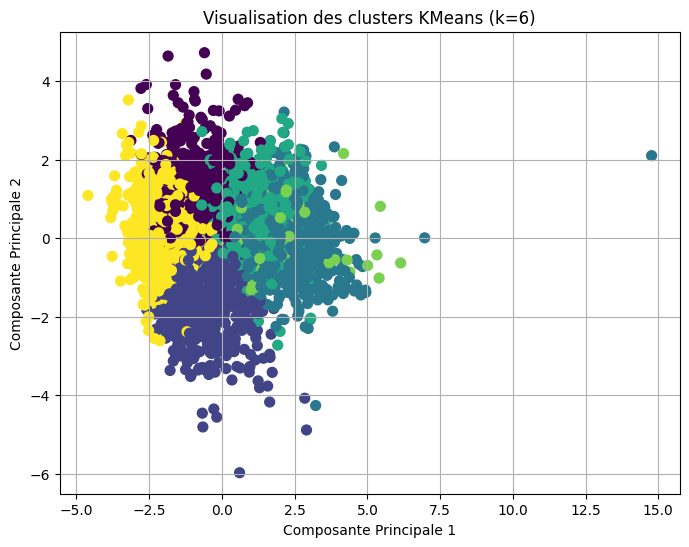

In [ ]:
# Affichage pour k=6
plot_kmeans_clusters(X_scaled, 6)


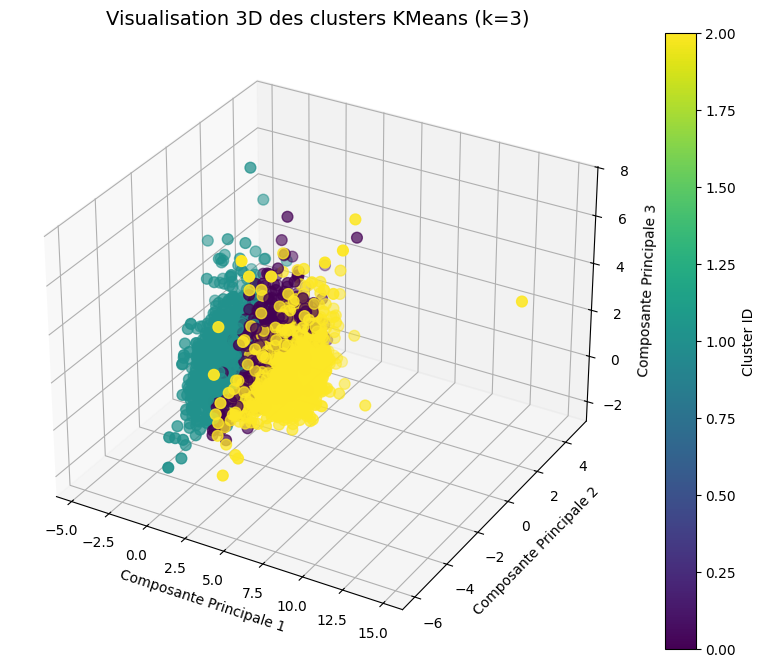

In [ ]:
def plot_3d_kmeans(X_scaled, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Réduction avec PCA à 3 composantes
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)

    # Création du graphique 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', s=60)

    ax.set_title(f"Visualisation 3D des clusters KMeans (k={n_clusters})", fontsize=14)
    ax.set_xlabel("Composante Principale 1")
    ax.set_ylabel("Composante Principale 2")
    ax.set_zlabel("Composante Principale 3")
    plt.colorbar(scatter, ax=ax, label="Cluster ID")
    plt.show()

# Appel pour k=3
plot_3d_kmeans(X_scaled, 3)



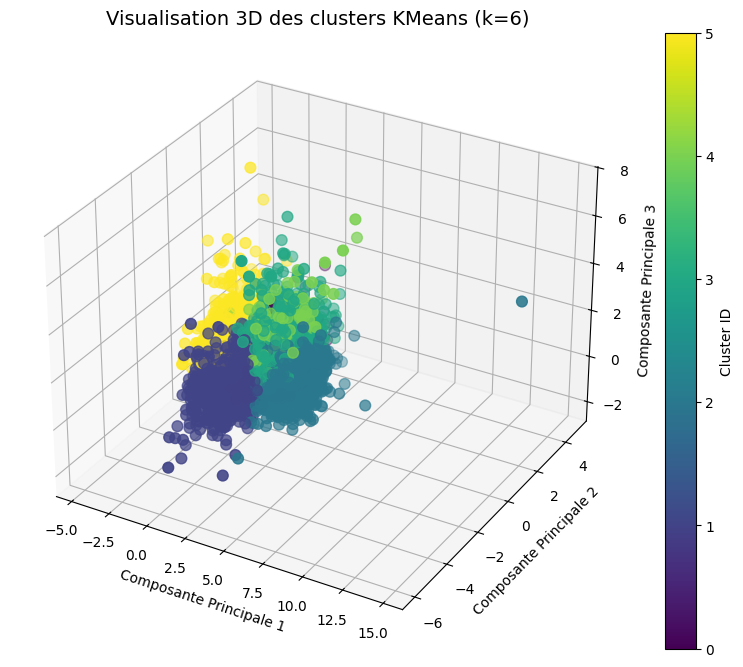

In [ ]:
plot_3d_kmeans(X_scaled, 6)

In [ ]:
df.to_csv('Base.csv', index=False)